In [1]:
import pandas as pd

# Load the CSV file
file_path = 'ONS_smoking_habits_in_the_uk_and_its_constituent_countries/Table_10.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(data.head())

       Sex Country code  Country Ethnicity \n[note 14]  \
0  Persons    E92000001  England                 White   
1  Persons    E92000001  England                 Mixed   
2  Persons    E92000001  England                 Asian   
3  Persons    E92000001  England               Chinese   
4  Persons    E92000001  England                 Black   

   2022\nCurrent smokers \n%  2022 \nCurrent smokers \nLCL  \
0                       13.2                          12.9   
1                       17.0                          13.9   
2                        7.4                           6.5   
3                        4.7                           2.1   
4                        8.4                           6.9   

   2022 \nCurrent smokers \nUCL  2022 \nEx-smokers \n%  \
0                          13.6                   27.7   
1                          20.1                   20.8   
2                           8.3                    8.3   
3                           7.3               

In [2]:
# Clean the column names
data.columns = data.columns.str.replace('\n', '').str.replace(' ', '_').str.replace('__', '_').str.strip()
print(data.columns.tolist())

['Sex', 'Country_code', 'Country', 'Ethnicity_[note_14]', '2022Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022_Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%2', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021_Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-sm

In [5]:
# Adjusted column names based on the inspection
columns_of_interest = [
    'Country', 'Ethnicity_[note_14]',
    '2022Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

# Select relevant columns for the year 2022
data_2022 = data[columns_of_interest].copy()
print(data_2022.head())

   Country Ethnicity_[note_14]  2022Current_smokers_%  \
0  England               White                   13.2   
1  England               Mixed                   17.0   
2  England               Asian                    7.4   
3  England             Chinese                    4.7   
4  England               Black                    8.4   

   2022_Current_smokers_LCL  2022_Current_smokers_UCL  2022_Ex-smokers_%  \
0                      12.9                      13.6               27.7   
1                      13.9                      20.1               20.8   
2                       6.5                       8.3                8.3   
3                       2.1                       7.3                8.5   
4                       6.9                       9.8               10.6   

   2022_Ex-smokers_LCL  2022_Ex-smokers_UCL  2022_Never_smoked_%  \
0                 27.3                 28.1                 59.1   
1                 18.0                 23.7                 62.2

In [7]:
# Convert percentage columns to numeric
percentage_columns = [
    '2022Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

for col in percentage_columns:
    data_2022[col] = pd.to_numeric(data_2022[col], errors='coerce')

# Check for missing data
missing_data_summary = data_2022.isnull().sum()
print(missing_data_summary)

Country                     0
Ethnicity_[note_14]         0
2022Current_smokers_%       0
2022_Current_smokers_LCL    0
2022_Current_smokers_UCL    0
2022_Ex-smokers_%           0
2022_Ex-smokers_LCL         0
2022_Ex-smokers_UCL         0
2022_Never_smoked_%         0
2022_Never_smoked_LCL       0
2022_Never_smoked_UCL       0
dtype: int64


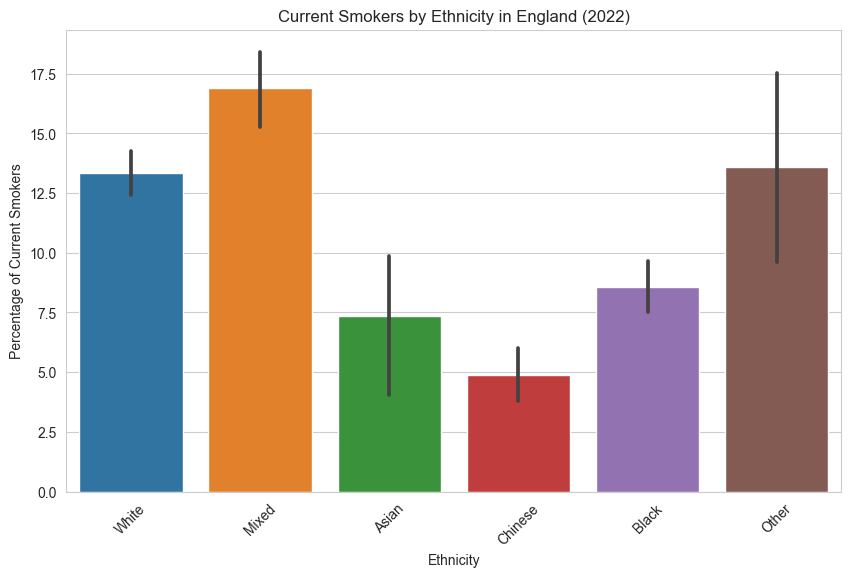

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for current smokers by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Ethnicity_[note_14]', y='2022Current_smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Current Smokers by Ethnicity in England (2022)')
plt.ylabel('Percentage of Current Smokers')
plt.xlabel('Ethnicity')
plt.show()

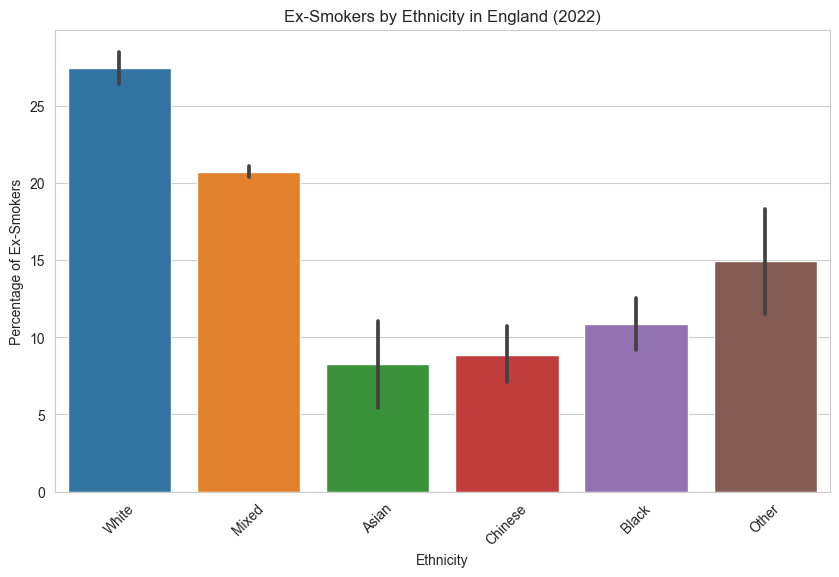

In [14]:
# Create a bar plot for Ex smokers by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Ethnicity_[note_14]', y='2022_Ex-smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Ex-Smokers by Ethnicity in England (2022)')
plt.ylabel('Percentage of Ex-Smokers')
plt.xlabel('Ethnicity')
plt.show()

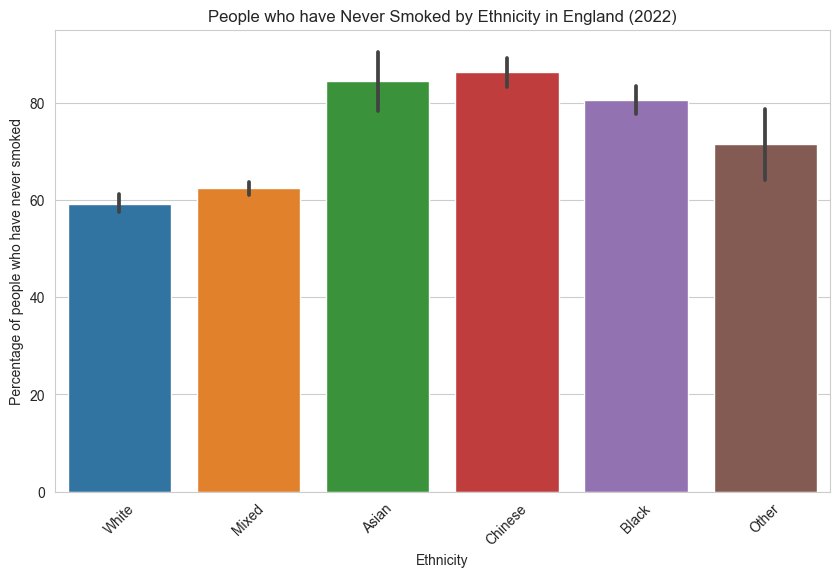

In [15]:
# Create a bar plot for people who have Never smoked by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Ethnicity_[note_14]', y='2022_Never_smoked_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('People who have Never Smoked by Ethnicity in England (2022)')
plt.ylabel('Percentage of people who have never smoked')
plt.xlabel('Ethnicity')
plt.show()

In [16]:
# Display the cleaned column names
print(data.columns.tolist())

# Extract the years present in the dataset based on column names
years = list(set([col.split('_')[0] for col in data.columns if col.split('_')[0].isdigit()]))
print("Years found in the dataset:", years)

# List of smoking status categories
smoking_statuses = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']

# Correct column names for melting
columns_to_melt = {}
for status in smoking_statuses:
    columns_to_melt[status] = [col for col in data.columns if status in col]

print("Columns to melt for each status:", columns_to_melt)

# Initialize an empty list to store dataframes
dfs = []

# Loop through each smoking status to melt the data
for status, status_cols in columns_to_melt.items():
    status_df = data.melt(id_vars=['Country', 'Ethnicity_[note_14]'],
                          value_vars=status_cols,
                          var_name='Year_Status',
                          value_name=status)
    
    # Extract year from the combined Year_Status column
    status_df['Year'] = status_df['Year_Status'].str.extract('(\d{4})').astype(int)
    
    # Drop the Year_Status column
    status_df = status_df.drop(columns=['Year_Status'])
    
    # Append the melted dataframe to the list
    dfs.append(status_df)

# Merge the dataframes on common columns
data_long = dfs[0]
for df in dfs[1:]:
    data_long = pd.merge(data_long, df, on=['Country', 'Ethnicity_[note_14]', 'Year'])

print(data_long.head())

['Sex', 'Country_code', 'Country', 'Ethnicity_[note_14]', '2022Current_smokers_%', '2022_Current_smokers_LCL', '2022_Current_smokers_UCL', '2022_Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022_Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%2', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021_Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-sm

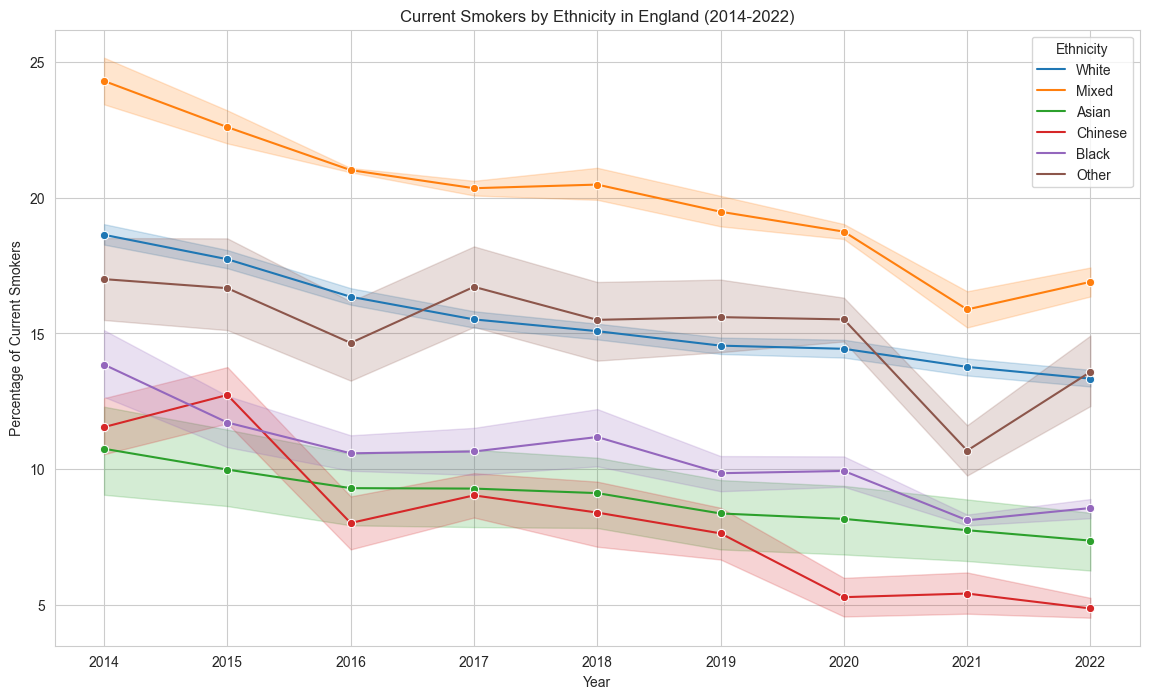

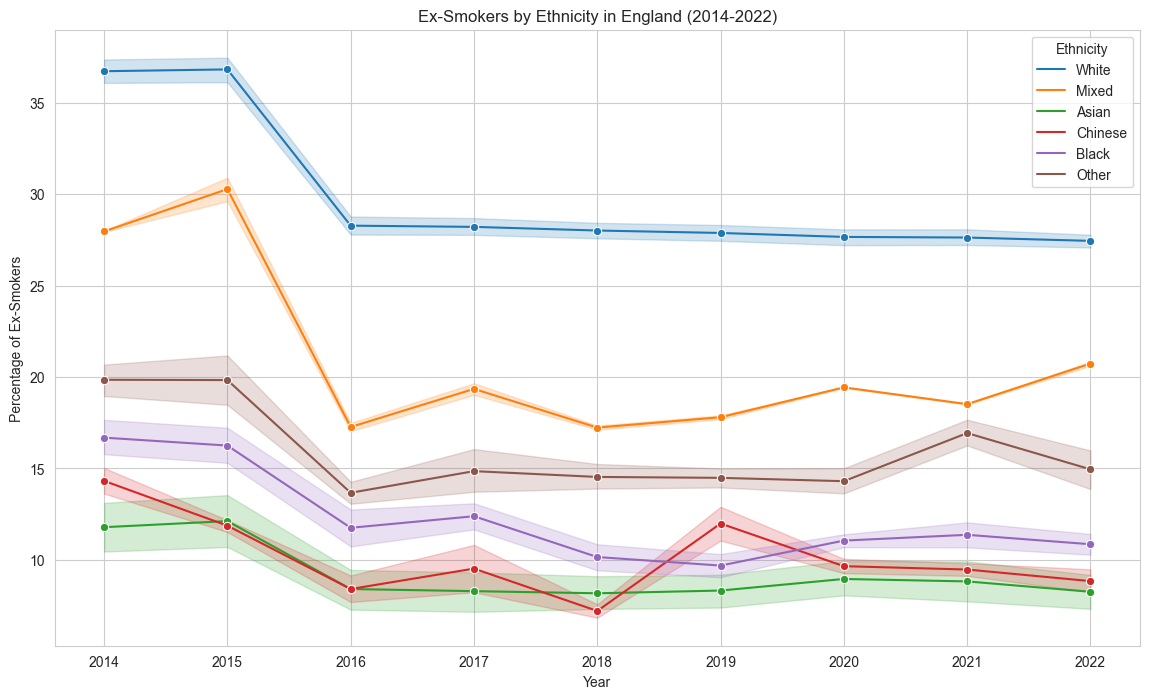

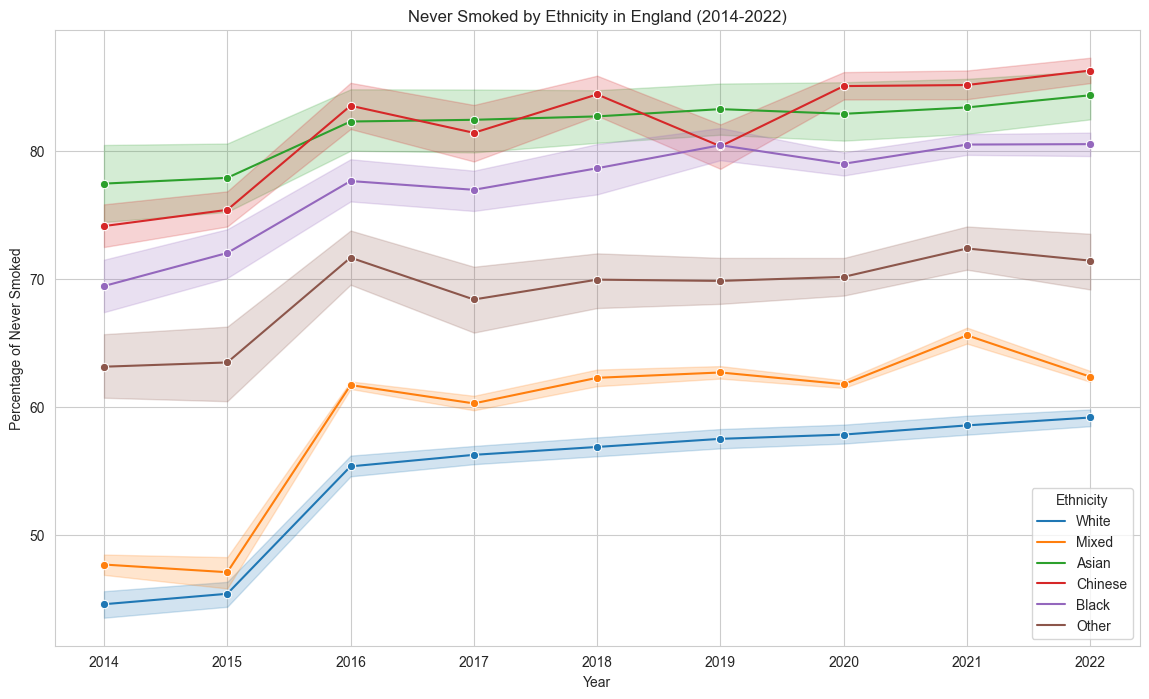

In [18]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create line plots for each smoking category by Ethnicity
smoking_categories = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']
titles = ['Current Smokers', 'Ex-Smokers', 'Never Smoked']

for category, title in zip(smoking_categories, titles):
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Year', y=category, hue='Ethnicity_[note_14]', data=data_long, marker='o')
    plt.title(f'{title} by Ethnicity in England (2014-2022)')
    plt.ylabel(f'Percentage of {title}')
    plt.xlabel('Year')
    plt.legend(title='Ethnicity')
    plt.show()